In [105]:
from sklearn.datasets import make_moons #달모양 데이터 셋 만듬
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트
from sklearn.model_selection import train_test_split #데이터셋 나누기
from sklearn.tree import DecisionTreeClassifier #의사결정트리
import matplotlib.pyplot as plt #그래프 그리기
import mglearn

In [111]:
#n_samples : 표본 데이터의 수, 디폴트 100
#noise: 잡음의 크기. 0이면 정확한 반원을 이룸
#random_state : 난수 발생 시드
X, y = make_moons(n_samples=100, noise=0.25, random_state=10)

In [112]:
#stratify : 지정한 Data의 비율을 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [113]:
#의사결정 트리로 구현
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('DecisionTree train : {}'.format(tree.score(X_train,y_train)))
print('DecisionTree test : {}'.format(tree.score(X_test,y_test)))
a = tree.predict(X_test)
a == y_test

DecisionTree train : 1.0
DecisionTree test : 0.92


array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [114]:
#랜덤 포레스트로 구현
#n_estimators : 생성할 tree의 개수
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print('RandomForest train : {}'.format(forest.score(X_train,y_train)))
print('RandomForest test : {}'.format(forest.score(X_test,y_test)))
a = forest.predict(X_test)
a == y_test

RandomForest train : 1.0
RandomForest test : 0.96


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

1
AxesSubplot(0.125,0.536818;0.227941x0.343182)
2
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
3
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
4
AxesSubplot(0.125,0.125;0.227941x0.343182)
5
AxesSubplot(0.398529,0.125;0.227941x0.343182)


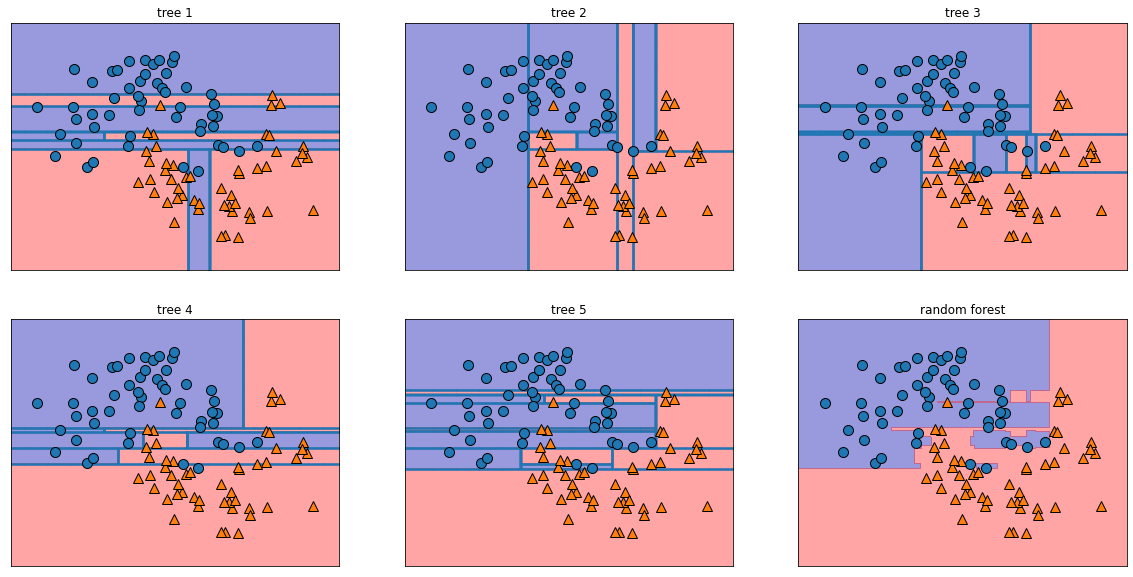

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    print(i + 1)
    print(ax)
    ax.set_title("tree {}".format(i + 1))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)